# Advent of code Day 8

Goal: Matrix playing, image display

Ref: http://adventofcode.com/2016/day/8

In [8]:
suppressMessages(library(binhf))
library(foreach)

In [2]:
screen <- matrix(0, nrow=6, ncol=50)

In [3]:
commands <- readLines("data.txt")

In [4]:
# Use shift lib to do the rotates
dump <- foreach(x=commands) %do% {
    if(startsWith(x,"rect")){
        size<-strsplit(x, ' ')
        xy <- strsplit(size[[1]][2], 'x')
        x <- xy[[1]][2]
        y <- xy[[1]][1]
        screen[0:x,0:y] = 1
        screen
    }
    else if (startsWith(x,"rotate column x=")){        
        size<-strsplit(x, '=')
        xy <- strsplit(size[[1]][2], ' ')
        col <- as.integer(xy[[1]][1])+1
        y <- as.integer(xy[[1]][3])
        screen[,col] = shift(screen[,col],y)
        screen        
    }
    else if (startsWith(x,"rotate row y=")){
        size<-strsplit(x, '=')
        xy <- strsplit(size[[1]][2], ' ')
        row <- as.integer(xy[[1]][1])+1
        y <- as.integer(xy[[1]][3])
        screen[row,] = shift(screen[row,],y)
        screen 
    }
}

In [5]:
sum(screen)

[1] 106

In [6]:
#Modify data and prepare parameter to show image
cols <- c(
'0' = "#FFFFFF",
'1' = "#000000"
)
mm <- apply((screen), 2, rev)

[1] "Q1 - There is  106  bright pixels on the screen"

[1] "Q2 - The screen output is: "

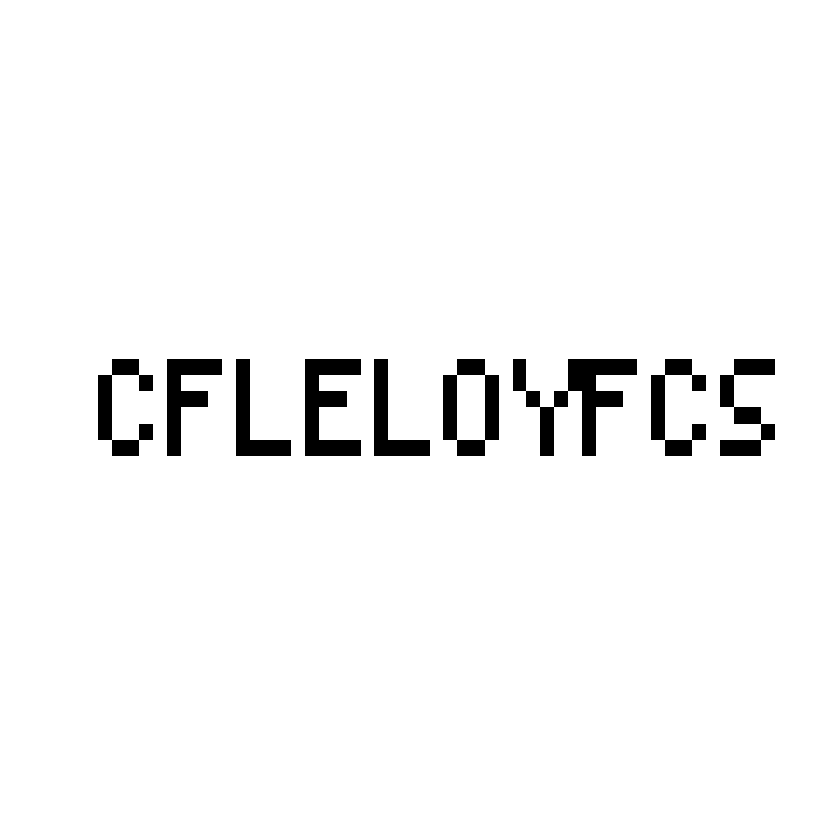

In [7]:
paste("Q1 - There is ", sum(screen), " bright pixels on the screen")
paste("Q2 - The screen output is: ")
image(t(mm), col=cols, xaxt="n",asp=6/50, yaxt="n", bty="n", )